In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [3]:
path = Path(".")
if not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

if not path.joinpath("cf-scripts").is_dir():
    !git clone https://github.com/regro/cf-scripts
    !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

In [4]:
gx = load_graph()

In [5]:
[n for n in gx.nodes if "stub" in n]

['pthread-stubs',
 'xorg-libpthread-stubs',
 'c_compiler_stub',
 'cxx_compiler_stub',
 'fortran_compiler_stub',
 'm2w64_c_compiler_stub',
 'm2w64_cxx_compiler_stub',
 'm2w64_fortran_compiler_stub',
 'compatible_pin_stub',
 'subpackage_stub',
 'cdt_stub',
 'go_compiler_stub',
 'cgo_compiler_stub',
 'pyspark-stubs',
 'cuda_compiler_stub',
 'go14_compiler_stub',
 'go-cgo_compiler_stub']

In [6]:
langs = {
    "pypy-meta": "Python",
    "c_compiler_stub": "C",
    "cxx_compiler_stub": "C++",
    "fortran_compiler_stub": "Fortran",
    "go_compiler_stub": "Go",
    "r-base": "R",
    "perl": "Perl",
}

In [7]:
double = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 2])
triple = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) >= 3])
others = len([k for k in gx.nodes if len(set(gx.predecessors(k)) & set(langs)) == 0])

In [8]:
ns = [len(list(gx.successors(k))) for k in langs]

In [9]:
ns.extend([double, triple, others])
langs.update({"double": "Dual", "triple": "Polyglot", "other": "Other"})

In [10]:
print(ns)

[5879, 2713, 1666, 297, 117, 2144, 84, 1504, 1037, 745]


In [11]:
import pandas as pd

df = pd.DataFrame([ns], columns=langs.values(), index=["Number of Packages"]).T
df.sort_values(by="Number of Packages", inplace=True)

In [12]:
df

,Number of Packages
Perl,84
Go,117
Fortran,297
Other,745
Polyglot,1037
Dual,1504
C++,1666
R,2144
C,2713
Python,5879


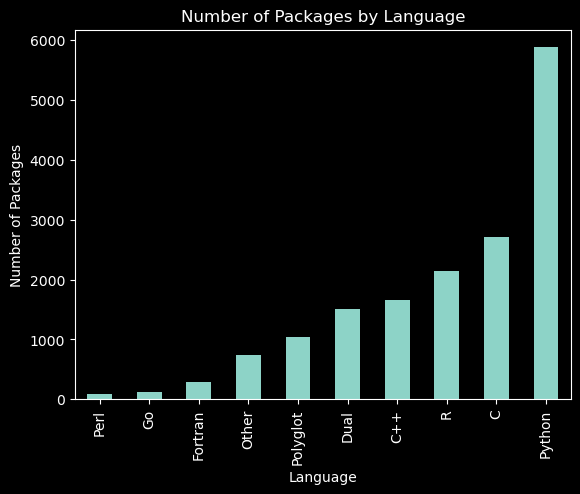

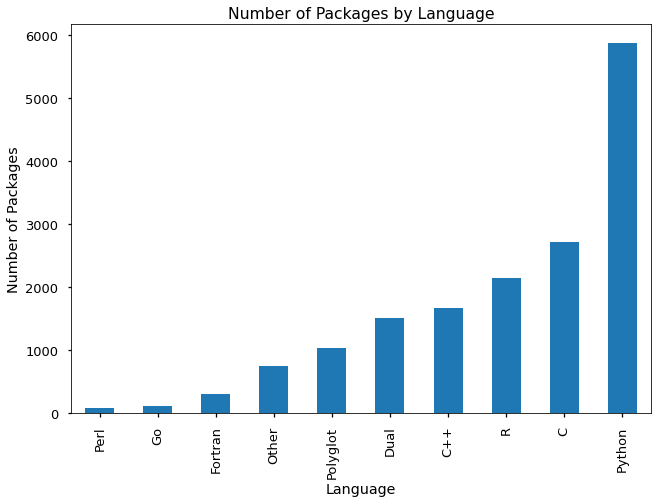

In [15]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df.plot.bar(legend=False, ax=ax)
        ax.set_title("Number of Packages by Language")
        ax.set_xlabel("Language")
        ax.set_ylabel("Number of Packages")
        fig.savefig(f"plots/n_packages_by_lang-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)

In [12]:
import hvplot.pandas  # noqa


df.hvplot.bar(legend=False)

ModuleNotFoundError: No module named 'hvplot'